DRY BEAN CLASS PRIDICTION

importing libraries

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#ml specific imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#algorithms
#linear classification
from sklearn.linear_model import LogisticRegression
#tree classification
from sklearn.tree import DecisionTreeClassifier
#neighbours classification
from sklearn.neighbors import KNeighborsClassifier
#naive bayes 
from sklearn.naive_bayes import GaussianNB
#support vector machine classification
from sklearn.svm import SVC
#ensemble methods
from sklearn.ensemble import RandomForestClassifier


load the dataset and explore it

In [22]:
df = pd.read_csv('../data/Dry_Bean_Dataset.csv')
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [24]:
df.isnull

<bound method DataFrame.isnull of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidit

make the target column numerical

In [25]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['Class'])

get all the features

In [26]:
X = df.drop('Class', axis=1) #features

pipelining for prediction

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
# 1. LogisticRegression
k = 10
clf1 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', LogisticRegression(solver='saga'))
    
])
#2. Decision Tree
clf2 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', DecisionTreeClassifier())
    
])
#3. Nearest Neighbors
clf3 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', KNeighborsClassifier())
    
])
#4. Gaussian Naive Bayes
clf4 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', GaussianNB())
    ])
#5. Support Vector Machine
clf5 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', SVC())
    ])
#6. Random Forest
clf6 = Pipeline([
        ('feature_selection', SelectKBest(chi2, k=k)),
        ('classification', RandomForestClassifier())
    ])

In [28]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the models
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

c:\Users\mihir\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x000001D5D9F90550>)),
                ('classification', RandomForestClassifier())])

In [37]:
ypred1 = clf1.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf3.predict(X_test)
ypred4 = clf4.predict(X_test)    
ypred5 = clf5.predict(X_test)
ypred6 = clf6.predict(X_test)


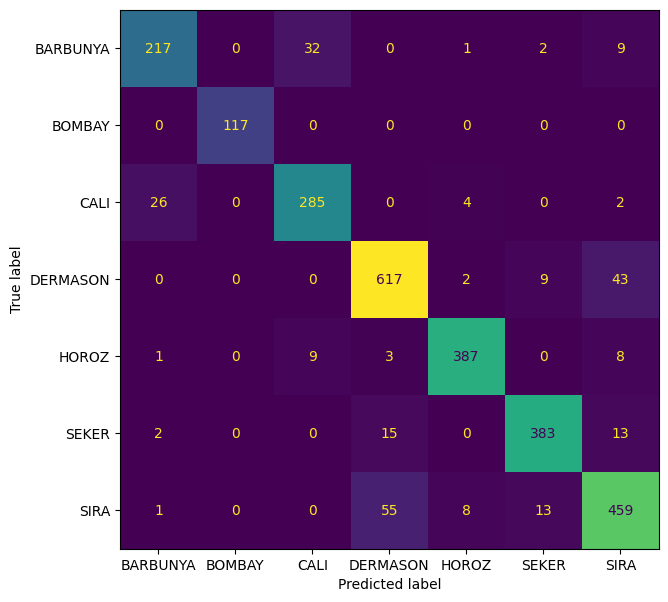

In [39]:
fig, ax = plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred6),
    display_labels=enc.classes_
).plot(ax=ax, colorbar=False)

In [40]:
print("LOGISTIC REGRESSION")
print('---'*20)
print(classification_report(y_test, ypred1, target_names=enc.classes_))

LOGISTIC REGRESSION
------------------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       261
      BOMBAY       0.00      0.00      0.00       117
        CALI       0.38      0.68      0.49       317
    DERMASON       0.33      1.00      0.49       671
       HOROZ       0.00      0.00      0.00       408
       SEKER       0.00      0.00      0.00       413
        SIRA       0.00      0.00      0.00       536

    accuracy                           0.33      2723
   macro avg       0.10      0.24      0.14      2723
weighted avg       0.13      0.33      0.18      2723



c:\Users\mihir\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mihir\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mihir\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
